Started on 7th Oct 2024



> Shyam S. et al (2023) "A systems-level analysis of the mutually antagonistic roles of RKIP and BACH1 in dynamics of cancer cell plasticity" J. R. Soc. Interface.2020230389


http://doi.org/10.1098/rsif.2023.0389



# Figure 1

In [ ]:
!wget -O tcga_dataset.txt.gz "https://toil-xena-hub.s3.us-east-1.amazonaws.com/download/tcga_RSEM_gene_tpm.gz"

In [ ]:
import gzip
import shutil

# Extract the gzipped file
with gzip.open('tcga_dataset.txt.gz', 'rb') as f_in:
    with open('tcga_dataset.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("File extracted successfully")


In [ ]:
import pandas as pd
tcga_data = pd.read_csv("tcga_dataset.txt", sep="\t")

## A

In [ ]:
!pip install gitpython

In [ ]:
import git
import shutil

# Clone the repository
repo_url = "https://github.com/saishyam1/RKIP_BACH1_Data_Codes"
repo_dir = "./Figure1_2"
git.Repo.clone_from(repo_url, repo_dir)

# Move the specific folder to your current directory
shutil.move(f"{repo_dir}/folder_name", "./")

# Clean up by removing the cloned repo
shutil.rmtree(repo_dir)

In [ ]:
!pip install gseapy mygene openpyxl

In [ ]:
import pandas as pd
import gseapy as gp
import mygene
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [ ]:
# Initialize MyGeneInfo client
mg = mygene.MyGeneInfo()

# Extract just the Ensembl gene ID without the version (split by dot '.')
tcga_data['ensembl_id'] = tcga_data['sample'].apply(lambda x: x.split('.')[0])

# Query MyGene.info to get gene symbols
# List of Ensembl IDs
ensembl_ids = tcga_data['ensembl_id'].tolist()

# Query the MyGene API to get the corresponding gene symbols
gene_info = mg.querymany(ensembl_ids, scopes='ensembl.gene', fields='symbol', species='human')

# Convert the result to a DataFrame
gene_info_df = pd.DataFrame(gene_info)

# Merge gene symbols into the original tcga_data DataFrame
tcga_data = tcga_data.merge(gene_info_df[['query', 'symbol']], left_on='ensembl_id', right_on='query', how='left')

# Remove rows where gene symbols couldn't be mapped
tcga_data = tcga_data[tcga_data['symbol'].notnull()]

# Drop unnecessary columns and rename 'symbol' to 'Gene'
tcga_data = tcga_data.rename(columns={'symbol': 'Gene'}).drop(['sample', 'ensembl_id', 'query'], axis=1)

# Reorder the columns to have 'Gene' as the first column
cols = ['Gene'] + [col for col in tcga_data.columns if col != 'Gene']
tcga_data = tcga_data[cols]

# Print final dataset with gene symbols and expression values for all samples
print(tcga_data.head())

In [ ]:
tcga_data

,Gene,TCGA-19-1787-01,TCGA-S9-A7J2-01,TCGA-G3-A3CH-11,TCGA-EK-A2RE-01,TCGA-44-6778-01,TCGA-F4-6854-01,TCGA-AB-2863-03,TCGA-C8-A1HL-01,TCGA-EW-A2FS-01,...,TCGA-DJ-A2QC-01,TCGA-A8-A09K-01,TCGA-61-1907-01,TCGA-IB-7885-01,TCGA-95-7947-01,TCGA-VQ-AA6F-01,TCGA-BR-8588-01,TCGA-24-2254-01,TCGA-DD-A115-01,TCGA-FV-A3I0-11
0,LINC02082,-9.9658,0.2998,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-1.3921,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-1.9379,-9.9658,-9.9658
2,ST8SIA5-DT,-3.8160,-3.0469,-9.9658,-9.9658,-5.5735,-9.9658,-3.4580,-9.9658,-5.0116,...,-6.5064,-9.9658,-9.9658,-9.9658,-6.5064,-9.9658,-9.9658,-5.5735,-9.9658,-9.9658
3,RAB4B,5.2998,4.8881,3.5572,4.2563,5.3162,4.5161,3.6242,4.9782,5.7035,...,5.4591,5.5364,4.7798,5.0514,6.1607,5.2814,3.9599,5.0760,4.0260,3.0876
5,TIGAR,3.5086,2.3019,0.0990,3.6184,3.5633,2.9109,2.1638,2.6624,1.2696,...,1.5998,2.8219,2.5876,2.6232,2.9525,3.0774,3.4384,2.2082,2.1541,-0.5756
6,LINC01224,0.8647,-1.0262,-9.9658,-9.9658,1.1316,0.9493,-9.9658,2.0535,0.4447,...,-2.9324,0.4125,1.0222,-1.7322,-4.6082,-0.4521,1.3511,3.1344,-1.3183,-9.9658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60494,GABARAPL3,-9.9658,-2.9324,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-2.9324,-9.9658,-9.9658
60496,BATF3,1.2271,1.1577,0.2642,0.5069,1.5902,0.6880,-1.6394,1.0293,1.4600,...,1.1316,-0.7346,0.3573,2.5707,1.6140,0.9862,1.9490,0.9642,0.3115,0.6145
60499,PPP6R1,5.2661,4.8151,3.4358,5.2851,5.6436,5.5958,6.7544,4.4095,4.4081,...,5.1700,5.3667,4.1161,4.9552,6.0228,6.1252,5.1473,6.2593,4.4647,3.2174
60500,LOC101927377,-0.2159,-3.3076,-2.5479,-5.0116,-1.3548,-9.9658,-0.9132,-5.0116,-1.8836,...,1.7141,-2.6349,-0.2671,-4.2934,-1.7322,-1.6850,-3.6259,-0.5543,-2.3884,-3.0469


In [ ]:
rkip_expression = tcga_data[tcga_data['Gene'] == 'PEBP1']

bach1_expression = tcga_data[tcga_data['Gene'] == 'BACH1']

In [ ]:

mapping_df = pd.read_csv("/content/TCGA_Sample_CancerType_Mapping.csv")

tcga_data_with_project = tcga_data.T.reset_index()

# Rename the 'index' column to 'sample'
tcga_data_with_project = tcga_data_with_project.rename(columns={'index': 'sample'})



In [ ]:
tcga_data_with_project = tcga_data_with_project.set_index('sample')


In [ ]:
tcga_data_with_project

,0,2,3,5,6,7,8,9,11,12,...,60488,60489,60491,60492,60493,60494,60496,60499,60500,60502
sample,,,,,,,,,,,,,,,,,,,,,
Gene,LINC02082,ST8SIA5-DT,RAB4B,TIGAR,LINC01224,MIR4802,RNF44,DNAH3,RPL23A,RPL7L1P12,...,LINC00272,SNORD121B,KIF16B,CYP4F2,TENM1,GABARAPL3,BATF3,PPP6R1,LOC101927377,OR8D4
TCGA-19-1787-01,-9.9658,-3.816,5.2998,3.5086,0.8647,-9.9658,4.2465,-5.0116,10.1571,-9.9658,...,-9.9658,-9.9658,2.5087,-0.9132,-1.4305,-9.9658,1.2271,5.2661,-0.2159,-9.9658
TCGA-S9-A7J2-01,0.2998,-3.0469,4.8881,2.3019,-1.0262,-9.9658,5.3806,-9.9658,9.7664,-9.9658,...,-9.9658,-9.9658,0.7748,-4.2934,1.5661,-2.9324,1.1577,4.8151,-3.3076,-9.9658
TCGA-G3-A3CH-11,-9.9658,-9.9658,3.5572,0.099,-9.9658,-9.9658,1.8323,-9.9658,8.3725,-9.9658,...,-9.9658,-9.9658,1.5902,6.864,-1.7809,-9.9658,0.2642,3.4358,-2.5479,-9.9658
TCGA-EK-A2RE-01,-9.9658,-9.9658,4.2563,3.6184,-9.9658,-9.9658,3.453,-1.8314,9.8839,-9.9658,...,-9.9658,-9.9658,2.9205,-1.8836,-6.5064,-9.9658,0.5069,5.2851,-5.0116,-9.9658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-VQ-AA6F-01,-9.9658,-9.9658,5.2814,3.0774,-0.4521,-9.9658,5.4087,0.434,10.2527,-9.9658,...,-9.9658,-9.9658,3.3134,-0.9971,-4.2934,-9.9658,0.9862,6.1252,-1.685,-9.9658
TCGA-BR-8588-01,-9.9658,-9.9658,3.9599,3.4384,1.3511,-9.9658,4.1812,-1.0262,10.0601,-2.7274,...,-9.9658,-9.9658,2.2452,0.9862,-3.1714,-9.9658,1.949,5.1473,-3.6259,-9.9658
TCGA-24-2254-01,-1.9379,-5.5735,5.076,2.2082,3.1344,-9.9658,5.6645,-0.1665,10.0724,-1.1488,...,-9.9658,-9.9658,2.6487,-9.9658,-3.1714,-2.9324,0.9642,6.2593,-0.5543,-5.0116


In [ ]:
KS_Tumor_Epi = """KRT19,AGR2,RAB25,CDH1,ERBB3,FXYD3,SLC44A4,S100P,SCNN1A,GALNT3,PRSS8,ELF3,CEACAM6,TMPRSS4,CLDN7,TACSTD2,CLDN3,EPCAM,SPINT1,TSPAN1,PLS1,TMEM30B,PRR15L,KRT8,ST14,RBM47,S100A14,C1ORF106,NQO1,TOX3,PTK6,TFF1,CLDN4,GPRC5A,TJP3,KRT18,MAP7,CKMT1A,ESRP1,MUC1,SPINT2,ESRP2,CDS1,PPAP2C,CEACAM7,TTC39A,OVOL2,EHF,AP1M2,CEACAM5,LAD1,ARHGAP8,TFF3,JUP,CD24,TMC5,MLPH,ELMO3,ERBB2,LLGL2,DDR1,FA2H,CBLC,TMPRSS2,LSR,PERP,POF1B,MYO5C,RAB11FIP1,MAPK13,KRT7,CEACAM1,CXADR,ATP2C2,RNF128,MPZL2,EPS8L1,GALNT7,CORO2A,BCAS1,TPD52,ARHGAP32,FUT2,OR7E14P,GALE,GRHL2,BIK,RAPGEFL1,STYK1,F11R,PKP3,CYB561,SH3YL1,GDF15,PSCA,EZR,TJP2,FGFR3,FUT3,BSPRY,TOM1L1,IRF6,EPB41L4B,OCLN,LRRC1,C19ORF21,ABHD11,EPS8L2,MYO6,TSPAN8,MST1R,SLC16A5,GPR56,AZGP1,TOB1,SLC35A3,TRPM4,PHLDA2,VAMP8,SLC22A18,AKR1B10,VAV3,SPAG1,ABCC3,SYNGR2,STAP2,C4ORF19,PPL,PLLP,DSG2,HDHD3,CD2AP,MANSC1,DHCR24,EPN3,TUFT1,GMDS,EXPH5,DSP,SDC4,IL20RA,FAM174B,PTPRF,SORD""".split(",")

KS_Tumor_Mes = """GAS1,CXCL12,ZEB1,GLYR1,FHL1,FERMT2,C1S,FYN,WIPF1,CYP1B1,SERPING1,SERPINF1,VCAM1,MAP1B,TCF4,SRPX,EMP3,DPT,CALD1,PTGIS,VIM,CD163,C1R,FBN1,FN1,FXYD6,IGF1,NAP1L3,MRC1,QKI,MS4A4A,DCN,LOX,RECK,ANK2,LY96,ZFPM2,CSRP2,EFEMP1,RARRES2,PTPRC,PLEKHO1,RGS2,F13A1,JAM2,CHRDL1,TUBA1A,AP1S2,MYLK,DDR2,DSE,SACS,GLIPR1,CXCL13,FLRT2,PTX3,AKT3,COL6A2,DPYSL3,CDH11,PDZRN3,ZEB2,CCL2,MAFB,SFRP1,C14ORF139,MFAP4,MAF,UCHL1,TUBB6,SRGN,HEG1,KCNJ8,AKAP12,EVI2A,COL14A1,AXL,ECM2,FSTL1,PLN,MYL9,OLFML3,STON1,SLIT2,BICC1,SOBP,CLIC4,ENPP2,SAMSN1,TPM2,ASPN,COL6A1,IGFBP5,MOXD1,AKAP2,SLC2A3,OLFML2B,ANGPTL2,PCOLCE,COLEC12,CTSK,TAGLN,CDH2,IL10RA,C1ORF54,CEP170,TNS1,CLEC2B,JAM3,GREM1,VCAN,ZCCHC24,CRYAB,SFRP4,RUNX1T1,FGL2,MS4A6A,PTRF,GIMAP4,TWIST1,GFPT2,LHFP,CXCR4,SPOCK1,SPARC,VSIG4,GPM6B,TRPC1,SNAI2,GUCY1B3,PLXNC1,SYT11,FLI1,MYH10,CSF2RB,TNC,PMP22,COL5A2,MMP2,GNG11,CAV1,CDK14,SDC2,PTGDS,NR3C1,SYNM,FAP,NUAK1,WWTR1,FBLN1,MPDZ,SYNE1,EFEMP2,GIMAP6,KIAA1462,CCL8,COL15A1,CHN1,CRISPLD2,PDGFC,GEM,ISLR,GZMK,SPARCL1,BNC2,BGN,MEOX2,ITM2A,IFFO1""".split(",")

FAO = """ECHS1	HADH	ACAA1	ACAA2	CD36	SLC25A20	IVD	ACADS	GCDH	ACADVL	ACADSB	ACAD8	ACAD9	ACAD10 """.split("\t")

Ferroptosis = """ENPP2	HELLS	ZFP36	SLC7A11	ALOX12	LPIN1	MUC1	TFRC	AKR1C1	TP63	TF	TNFAIP3	HMOX1	SLC3A2	SOCS1	PANX1	ALOX15B	CD44	BRD4	GPX4	OTUB1	ATM	CISD2	ARNTL	ZEB1	MT1G	PTGS2	GCLC	ACSL4	DPP4	FADS2	CHAC1	PRKAA2	CAV1	MAPK3	TLR4	SESN2	SCP2	CA9	CBS	LAMP2	BID	ALOX5	CDKN2A	PGD""".split("\t")

PDL1	= """CD274	PDCD1LG2	JAK2	GBP5	SAMD9L	IL2RB	PTPRC	GBP1	P2RY10	DOCK2	TLR8	TFEC	CD84	GBP4	TRIM22	GPR174	FYB	CD80	SAMSN1	PLEK	LCP2	CCR5	CD226	LOC400759	ICOS	ITK	PARP14	APOL6	CD3G	GVIN1	EVI2B	SLFN12L	MNDA	CD86	TAGAP	STX11	IFIT3	STAT1	TIGIT	CXCL10	CLEC7A	CYBB	CD53	FPR3	IGSF6 """.split("\t")

Glycolysis	=	"""ABCB6	ADORA2B	AGL	AGRN	AK3	AK4	AKR1A1	ALDH7A1	ALDH9A1	ALDOA	ALDOB	ALG1	ANG	ANGPTL4	ANKZF1	ARPP19	ARTN	AURKA	B3GALT6	B3GAT1	B3GAT3	B3GNT3	B4GALT1	B4GALT2	B4GALT4	B4GALT7	BIK	BPNT1	CACNA1H	CAPN5	CASP6	CD44	CDK1	CENPA	CHPF	CHPF2	CHST1	CHST12	CHST2	CHST4	CHST6	CITED2	CLDN3	CLDN9	CLN6	COG2	COL5A1	COPB2	CTH	CXCR4	CYB5A	DCN	DDIT4	DEPDC1	DLD	DPYSL4	DSC2	ECD	EFNA3	EGFR	EGLN3	ELF3	ENO1	ENO2	ERO1A	EXT1	EXT2	FAM162A	FBP2	FKBP4	FUT8	G6PD	GAL3ST1	GALE	GALK1	GALK2	GAPDHS	GCLC	GFPT1	GLCE	GLRX	GMPPA	GMPPB	GNE	GNPDA1	GOT1	GOT2	GPC1	GPC3	GPC4	GPR87	GUSB	GYS1	GYS2	HAX1	HDLBP	HK2	HMMR	HOMER1	HS2ST1	HS6ST2	HSPA5	IDH1	IDUA	IER3	IGFBP3	IL13RA1	IRS2	ISG20	KDELR3	KIF20A	KIF2A	LCT	LDHA	LDHC	LHPP	LHX9	MDH1	MDH2	ME1	ME2	MED24	MERTK	MET	MIF	MIOX	MPI	MXI1	NANP	NASP	NDST3	NDUFV3	NOL3	NSDHL	NT5E	P4HA1	P4HA2	PAM	PAXIP1	PC	PDK3	PFKFB1	PFKP	PGAM1	PGAM2	PGK1	PGLS	PGM2	PHKA2	PKM	PKP2	PLOD1	PLOD2	PMM2	POLR3K	PPFIA4	PPIA	PPP2CB	PRPS1	PSMC4	PYGB	PYGL	QSOX1	RARS1	RBCK1	RPE	RRAGD	SAP30	SDC1	SDC2	SDC3	SDHC	SLC16A3	SLC25A10	SLC25A13	SLC35A3	SLC37A4	SOD1	SOX9	SPAG4	SRD5A3	STC1	STC2	STMN1	TALDO1	TFF3	TGFA	TGFBI	TKTL1	TPBG	TPI1	TPST1	TSTA3	TXN	UGP2	VCAN	VEGFA	VLDLR	XYLT2	ZNF292""".split("\t")

OXPHOS = """ABCB7	ACAA1	ACAA2	ACADM	ACADSB	ACADVL	ACAT1	ACO2	AFG3L2	AIFM1	ALAS1	ALDH6A1	ATP1B1	ATP5F1A	ATP5F1B	ATP5F1C	ATP5F1D	ATP5F1E	ATP5MC1	ATP5MC2	ATP5MC3	ATP5ME	ATP5MF	ATP5MG	ATP5PB	ATP5PD	ATP5PF	ATP5PO	ATP6AP1	ATP6V0B	ATP6V0C	ATP6V0E1	ATP6V1C1	ATP6V1D	ATP6V1E1	ATP6V1F	ATP6V1G1	ATP6V1H	BAX	BCKDHA	BDH2	CASP7	COX10	COX11	COX15	COX17	COX4I1	COX5A	COX5B	COX6A1	COX6B1	COX6C	COX7A2	COX7A2L	COX7B	COX7C	COX8A	CPT1A	CS	CYB5A	CYB5R3	CYC1	CYCS	DECR1	DLAT	DLD	DLST	ECH1	ECHS1	ECI1	ETFA	ETFB	ETFDH	FDX1	FH	FXN	GLUD1	GOT2	GPI	GPX4	GRPEL1	HADHA	HADHB	HCCS	HSD17B10	HSPA9	HTRA2	IDH1	IDH2	IDH3A	IDH3B	IDH3G	IMMT	ISCA1	ISCU	LDHA	LDHB	LRPPRC	MAOB	MDH1	MDH2	MFN2	MGST3	MPC1	MRPL11	MRPL15	MRPL34	MRPL35	MRPS11	MRPS12	MRPS15	MRPS22	MRPS30	MTRF1	MTRR	MTX2	NDUFA1	NDUFA2	NDUFA3	NDUFA4	NDUFA5	NDUFA6	NDUFA7	NDUFA8	NDUFA9	NDUFAB1	NDUFB1	NDUFB2	NDUFB3	NDUFB4	NDUFB5	NDUFB6	NDUFB7	NDUFB8	NDUFC1	NDUFC2	NDUFS1	NDUFS2	NDUFS3	NDUFS4	NDUFS6	NDUFS7	NDUFS8	NDUFV1	NDUFV2	NNT	NQO2	OAT	OGDH	OPA1	OXA1L	PDHA1	PDHB	PDHX	PDK4	PDP1	PHB2	PHYH	PMPCA	POLR2F	POR	PRDX3	RETSAT	RHOT1	RHOT2	SDHA	SDHB	SDHC	SDHD	SLC25A11	SLC25A12	SLC25A20	SLC25A3	SLC25A4	SLC25A5	SLC25A6	SUCLA2	SUCLG1	SUPV3L1	SURF1	TCIRG1	TIMM10	TIMM13	TIMM17A	TIMM50	TIMM8B	TIMM9	TOMM22	TOMM70	UQCR10	UQCR11	UQCRB	UQCRC1	UQCRC2	UQCRFS1	UQCRH	UQCRQ	VDAC1	VDAC2	VDAC3""".split("\t")


In [ ]:
# Load the gene signature from the .gmt file (KS_Epi and KS_Mes)
gene_sets_dict = {
    'KS_Epi': KS_Tumor_Epi,
    'KS_Mes': KS_Tumor_Mes,
    'FAO': FAO,
    'Ferroptosis': Ferroptosis,
    'PDL1': PDL1,
    'Glycolysis': Glycolysis,
    'OXPHOS': OXPHOS
}

In [ ]:
tcga_data.set_index('Gene', inplace=True)
tcga_data.index

Index(['LINC02082', 'ST8SIA5-DT', 'RAB4B', 'TIGAR', 'LINC01224', 'MIR4802',
       'RNF44', 'DNAH3', 'RPL23A', 'RPL7L1P12',
       ...
       'LINC00272', 'SNORD121B', 'KIF16B', 'CYP4F2', 'TENM1', 'GABARAPL3',
       'BATF3', 'PPP6R1', 'LOC101927377', 'OR8D4'],
      dtype='object', name='Gene', length=43308)

In [ ]:
# Perform ssGSEA
ssgsea_scores = gp.ssgsea(data=tcga_data, gene_sets=gene_sets_dict, sample_norm_method='rank', outdir="./", min_size=10)
ssgsea_df = ssgsea_scores.res2d

In [ ]:
ssgsea_df

,Name,Term,ES,NES
0,TCGA-DD-A73C-01,FAO,20227.785468,0.574557
1,TCGA-G3-A7M8-01,FAO,20128.324439,0.571732
2,TCGA-KM-8441-01,OXPHOS,20117.697096,0.57143
3,TCGA-MH-A857-01,OXPHOS,20097.412837,0.570854
4,TCGA-KN-8437-01,OXPHOS,20074.830101,0.570212
...,...,...,...,...
73740,TCGA-DX-AB3C-01,PDL1,2146.004307,0.060956
73741,TCGA-25-1870-01,KS_Epi,-2138.487006,-0.060742
73742,TCGA-JV-A75J-01,PDL1,2066.251987,0.058691
73743,TCGA-KQ-A41O-01,PDL1,1469.300533,0.041735


In [ ]:
mapping_df

,level_0,index,sample,TCGA-WB-A820,TCGA-S7-A7WN,TCGA-S7-A7WL,TCGA-WB-A80K,TCGA-SR-A6MX,TCGA-TT-A6YO,TCGA-RM-A68T,...,TCGA-FL-A1YF,TCGA-FL-A1YL,TCGA-FL-A1YN,TCGA-FL-A1YV,TCGA-FL-A1YI,TCGA-FL-A1YU,TCGA-FL-A1YT,TCGA-FL-A1YH,TCGA-FL-A3WE,TCGA-FL-A1YG
0,0,0,project,PCPG,PCPG,PCPG,PCPG,PCPG,PCPG,PCPG,...,UCEC,UCEC,UCEC,UCEC,UCEC,UCEC,UCEC,UCEC,UCEC,UCEC


In [ ]:
ssgsea_df.rename(columns={'Name': 'sample'}, inplace=True)

In [ ]:
mapping_df = mapping_df.drop(["index"], axis = 1)

In [ ]:
mapping_df

,0
0,0
1,project
2,PCPG
3,PCPG
4,PCPG
...,...
11425,UCEC
11426,UCEC
11427,UCEC
11428,UCEC


In [ ]:
# Perform the merge using 'sample'
merged_df = pd.merge(mapping_df, ssgsea_df, on='sample', how='right')

In [ ]:
KS_Tumor_Epi_scores = ssgsea_df[ssgsea_df['Term'] == "KS_Epi"][["Name", "NES"]]
KS_Tumor_Mes_scores = ssgsea_df[ssgsea_df['Term'] == "KS_Mes"][["Name", "NES"]]
FAO_scores = ssgsea_df[ssgsea_df['Term'] == "FAO"][["Name", "NES"]]
Ferroptosis_scores = ssgsea_df[ssgsea_df['Term'] == "Ferroptosis"][["Name", "NES"]]
PDL1_scores = ssgsea_df[ssgsea_df['Term'] == "PDL1"][["Name", "NES"]]
Glycolysis_scores = ssgsea_df[ssgsea_df['Term'] == "Glycolysis"][["Name", "NES"]]
OXPHOS_scores = ssgsea_df[ssgsea_df['Term'] == "OXPHOS"][["Name", "NES"]]

In [ ]:
# @title KS Score
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

# Function to calculate KS score for a sample
def calculate_ks_score(sample_values, epi_genes, mes_genes):
    # Get the intersection of genes in the sample and the gene sets
    common_epi_genes = list(set(epi_genes) & set(sample_values.index))
    print(common_epi_genes)
    common_mes_genes = list(set(mes_genes) & set(sample_values.index))
    print(common_mes_genes)
    # Extract expression values for KS-Epi and KS-Mes genes (using the common genes)
    epi_values = sample_values.loc[common_epi_genes].dropna()
    mes_values = sample_values.loc[common_mes_genes].dropna()

    # Ensure both have values to compare
    if len(epi_values) > 0 and len(mes_values) > 0:
        # Perform KS test
        ks_stat, _ = ks_2samp(epi_values, mes_values)
        return ks_stat
    else:
        return np.nan

ks_scores = tcga_data.apply(calculate_ks_score, axis=0, args=(KS_Tumor_Epi, KS_Tumor_Mes))

# Add the KS scores column
tcga_data.loc['KS_Score'] = ks_scores

In [ ]:
tcga_data.loc['KS_Score']

In [ ]:
# Initialize results dictionary
results = {}

# Define the comparisons
comparisons = {
    'RKIP vs BACH1': ('PEBP1', 'BACH1'),
    'RKIP vs KS_Mes': ('PEBP1', 'KS_Mes'),
    'RKIP vs KS_Epi': ('PEBP1', 'KS_Epi'),
    'BACH1 vs KS_Mes': ('BACH1', 'KS_Mes'),
    'BACH1 vs KS_Epi': ('BACH1', 'KS_Epi')
}

# Calculate Spearman correlation for each comparison
for comp, (gene1, gene2) in comparisons.items():
    if 'KS' in gene2:  # For KS-related signatures
        ssgsea_score = ssgsea_df[ssgsea_df['Term'] == gene2]
        gene_expression = tcga_data.loc[gene1, :]
    else:  # For gene-gene correlation (RKIP vs BACH1)
        gene_expression = tcga_data.loc[gene1,:]
        ssgsea_score = tcga_data.loc[gene2,:]

    # Compute Spearman correlation
    corr, _ = spearmanr(gene_expression, ssgsea_score)
    results[comp] = corr

cancer_types = tcga_data.columns[1:]

# Create a correlation matrix for visualization
corr_matrix = pd.DataFrame({
    'RKIP vs BACH1': [results['PEBP1 vs BACH1']],
    'RKIP vs KS_Mes': [results['PEBP1 vs KS_Mes']],
    'RKIP vs KS_Epi': [results['PEBP1 vs KS_Epi']],
    'BACH1 vs KS_Mes': [results['BACH1 vs KS_Mes']],
    'BACH1 vs KS_Epi': [results['BACH1 vs KS_Epi']]
}, index=cancer_types)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix.T, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Spearman Correlation'})
plt.show()

# Figure 2

In [ ]:
import gzip
import shutil

!wget -O tcga_brca.gz "https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.BRCA.sampleMap%2FHiSeqV2.gz"

# Extract the gzipped file
with gzip.open('tcga_brca.gz', 'rb') as f_in:
    with open('tcga_brca.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("File extracted successfully")


In [ ]:
import pandas as pd
tcga_brca = pd.read_csv("tcga_brca.tsv", sep="\t")
tcga_brca

,sample,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
0,ARHGEF10L,-0.356592,-2.429392,-0.542392,-0.844192,-0.222292,-0.097492,0.229108,-0.711592,0.075808,...,-0.237492,0.318608,0.055908,0.045008,0.169408,1.650408,0.710508,-0.459192,1.082808,0.452408
1,HIF3A,-3.976026,-1.894026,-2.832326,-4.213326,-4.972826,-5.280926,-1.945726,-5.080926,-2.616926,...,2.599874,-3.338826,-1.690226,2.632474,-4.671126,-4.237826,-1.485126,1.698974,-4.623726,-3.135626
2,RNF17,-0.531035,0.093465,0.021565,-0.531035,-0.531035,0.345465,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,3.199465,-0.531035,-0.531035,0.601865,-0.105235,-0.531035,-0.531035,-0.531035
3,RNF10,-0.409972,0.140528,0.188928,1.410528,0.226028,0.034228,-0.395572,-0.277172,0.427928,...,0.209328,0.487728,0.703928,0.048728,0.235928,-0.195772,0.088728,-0.231572,0.484028,0.379428
4,RNF11,0.161322,2.559422,0.442622,0.123222,0.286622,-0.112478,-0.201578,-0.532078,0.253122,...,0.966522,0.443822,-0.477678,0.607522,-0.130878,-0.694278,-0.203478,0.909522,-0.183678,0.274122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,PTRF,1.987914,-1.186286,1.104414,0.436914,-0.559086,0.878214,-0.074786,0.914414,0.235914,...,2.477414,0.357714,1.090914,2.631314,-0.577286,-0.632386,0.861914,1.220214,0.660514,-2.380286
20526,BCL6B,-0.081627,-0.217927,0.872773,0.238973,0.253973,1.266073,0.443073,1.520773,0.896373,...,2.313873,0.091073,0.529073,1.725973,0.273673,1.021673,1.601073,1.241673,1.295073,-1.357227
20527,GSTK1,0.297105,-1.964495,0.208205,0.170705,-0.441995,-0.615995,-0.377895,0.269905,0.321005,...,0.561405,0.360005,-0.022995,0.280505,-0.354295,-0.177995,-0.004095,-0.160695,0.915105,0.461105
20528,SELP,2.320067,-5.525533,2.850967,1.532967,1.573667,0.374767,1.056767,-1.410333,3.330467,...,4.450367,1.719467,-0.850433,4.197267,2.641767,0.158267,3.109267,3.963667,0.168567,-3.859133


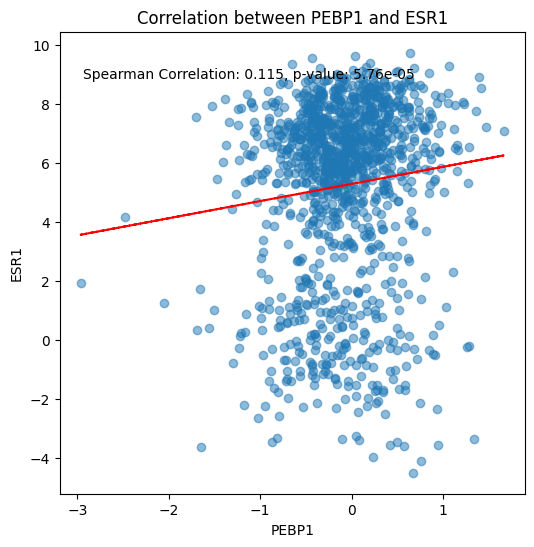

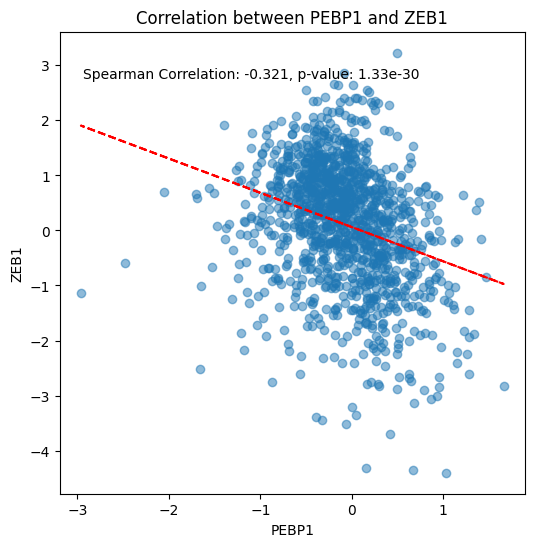

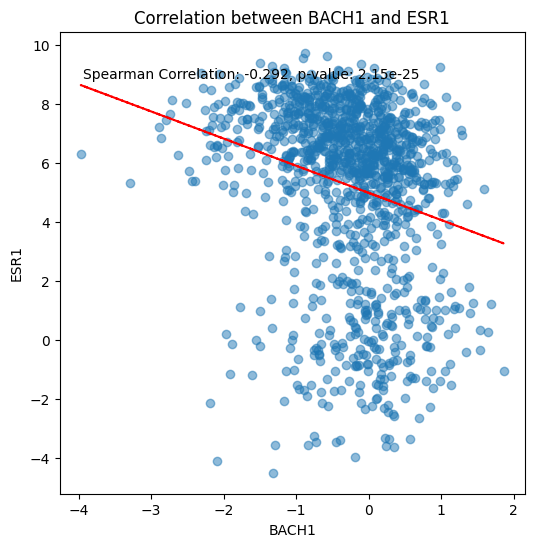

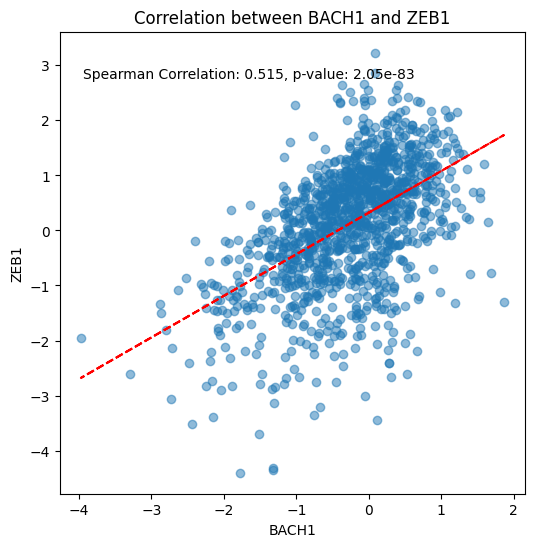

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

gene_pairs = [('PEBP1', 'ESR1'), ('PEBP1', 'ZEB1'), ('BACH1', 'ESR1'), ('BACH1', 'ZEB1')]

for gene1, gene2 in gene_pairs:

    x = tcga_brca[tcga_brca['sample'] == gene1].iloc[:, 1:].values.flatten()
    y = tcga_brca[tcga_brca['sample'] == gene2].iloc[:, 1:].values.flatten()

    # Calculate Spearman correlation and p-value
    correlation, p_value = spearmanr(x, y)

    # Create a scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel(gene1)
    plt.ylabel(gene2)
    plt.title(f"Correlation between {gene1} and {gene2}")

    # Add regression line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--")

    # Display correlation and p-value on the plot
    plt.text(0.05, 0.9, f"Spearman Correlation: {correlation:.3f}, p-value: {p_value:.2e}",
             transform=plt.gca().transAxes)

    plt.show()

In [ ]:
!pip install gitpython

In [ ]:
import git
import shutil

# Clone the repository
repo_url = "https://github.com/saishyam1/RKIP_BACH1_Data_Codes/"
repo_dir = "./Figure1_2"
git.Repo.clone_from(repo_url, repo_dir)

# Move the specific folder to your current directory
shutil.move(f"{repo_dir}", "./")

# Clean up by removing the cloned repo
shutil.rmtree(repo_dir)

In [ ]:
rpms = pd.read_csv("/content/Figure2E/Gene_Signatures/GenSig_RKIP_Metastasis.gmt", sep = "\t").iloc[:,1:]

bpms = pd.read_csv("/content/Figure2E/Gene_Signatures/BACH1_Metastasis.gmt", sep = "\t").iloc[:,2:15]

pdl1 = pd.read_csv("/content/Figure2E/Gene_Signatures/GenSig_PD-L1.gmt", sep = "\t").iloc[:,2:]

In [ ]:
!pip install gseapy

In [ ]:
tcga_brca.set_index('sample', inplace=True)

In [ ]:
import gseapy as gp

# Combine all gene sets into a dictionary
gene_sets_dict = {
    'rpms': rpms.columns.tolist(),
    'bpms': bpms.columns.tolist(),
    'pdl1': pdl1.columns.tolist()
}

# Perform ssGSEA
ssgsea_scores = gp.ssgsea(data=tcga_brca, gene_sets=gene_sets_dict, sample_norm_method='rank', outdir="./", min_size=10)
ssgsea_df = ssgsea_scores.res2d


In [ ]:
ssgsea_df

,Name,Term,ES,NES
0,TCGA-AO-A128-01,pdl1,9860.701771,0.533596
1,TCGA-A2-A25F-01,pdl1,9834.562611,0.532182
2,TCGA-AR-A1AW-01,pdl1,9825.849888,0.53171
3,TCGA-C8-A12V-01,pdl1,9728.209355,0.526427
4,TCGA-AR-A1AJ-01,pdl1,9669.154516,0.523231
...,...,...,...,...
3649,TCGA-E2-A14Y-01,pdl1,4.500167,0.000244
3650,TCGA-A2-A3XV-01,rpms,-3.890132,-0.000211
3651,TCGA-D8-A1Y2-01,bpms,-1.562943,-0.000085
3652,TCGA-BH-A0DZ-11,bpms,1.534692,0.000083


In [ ]:
rpms_scores = pd.to_numeric(ssgsea_df[ssgsea_df['Term'] == 'rpms']['NES'].values)
bpms_scores = pd.to_numeric(ssgsea_df[ssgsea_df['Term'] == 'bpms']['NES'].values)
pdl1_scores = pd.to_numeric(ssgsea_df[ssgsea_df['Term'] == 'pdl1']['NES'].values)


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np


pairs = [('PEBP1', rpms_scores), ('BACH1', bpms_scores)]

for gene1, gene2 in pairs:
    x = tcga_brca.loc[gene1, :].values.flatten()
    y = gene2

    # Calculate Spearman correlation and p-value
    correlation, p_value = spearmanr(x, y)

    # Create a scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel(gene1)
    plt.ylabel(gene1 + " pathway metastasis signatures")

    # Add regression line
    z = np.polyfit(x, y, 1) # Calculate coefficients for the regression line
    p = np.poly1d(z) # Create a polynomial function representing the regression line
    plt.plot(x, p(x), "r--") # Plot the regression line (red dashed line)


    # Display correlation and p-value on the plot
    plt.text(0.05, 0.9, f"Spearman Correlation: {correlation:.3f}, p-value: {p_value:.2e}",
             transform=plt.gca().transAxes)

    plt.show()

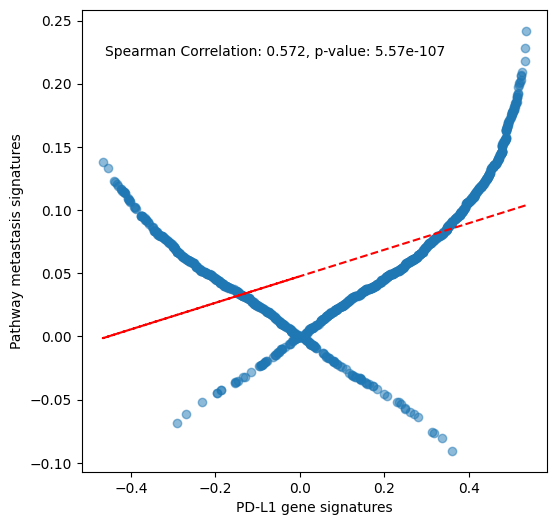

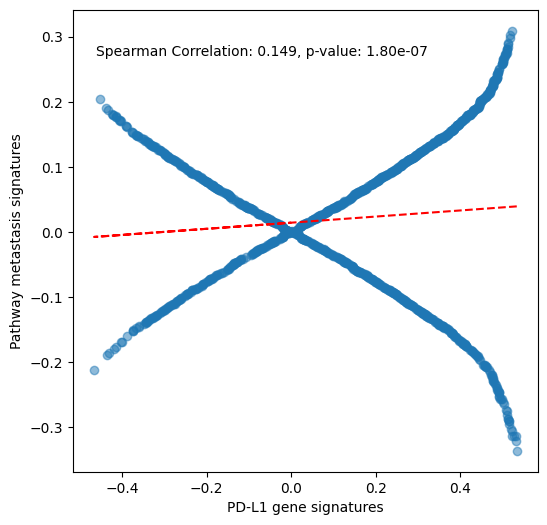

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np


pairs = [(pdl1_scores, rpms_scores), (pdl1_scores, bpms_scores)]

for score1, score2 in pairs:
    x = score1
    y = score2

    # Calculate Spearman correlation and p-value
    correlation, p_value = spearmanr(x, y)

    # Create a scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel("PD-L1 gene signatures")
    plt.ylabel("Pathway metastasis signatures")
    #plt.title(f"Correlation between {gene1} and {gene2}")

    # Add regression line
    z = np.polyfit(x, y, 1) # Calculate coefficients for the regression line
    p = np.poly1d(z) # Create a polynomial function representing the regression line
    plt.plot(x, p(x), "r--") # Plot the regression line (red dashed line)


    # Display correlation and p-value on the plot
    plt.text(0.05, 0.9, f"Spearman Correlation: {correlation:.3f}, p-value: {p_value:.2e}",
             transform=plt.gca().transAxes)

    plt.show()

In [ ]:
print(pdl1_scores)
print(bpms_scores)
print(rpms_scores)

[ 5.33596294e-01  5.32181815e-01  5.31710339e-01 ... -1.35745667e-03
  2.43519422e-04 -2.59519703e-05]
[-3.36668474e-01 -3.22419218e-01 -3.14608612e-01 ...  3.20453016e-04
 -8.45762156e-05  8.30474552e-05]
[ 2.41936978e-01  2.28065636e-01  2.17635678e-01 ... -2.87834545e-04
 -2.84077065e-04 -2.10508343e-04]


## E: Heatmaps

In [ ]:
import re

gses = ["GSE17705", "GSE24202", "GSE43495", "GSE6532", "GSE67916", "GSE9195"]

for gse in gses:

    if gse == "GSE6532":  # Exception for GSE6532
        url = "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE6nnn/GSE6532/matrix/GSE6532-GPL570_series_matrix.txt.gz"
    else:
    # Extract prefix (letters and numbers before the last 3 digits)
    prefix = re.sub(r'(\d{3})$', '', gse)

    print(prefix)

    # Construct URL
    url = f"https://ftp.ncbi.nlm.nih.gov/geo/series/{prefix}nnn/{gse}/matrix/{gse}_series_matrix.txt.gz"

    try:
        # Download and extract
        !wget -O {gse}_series_matrix.txt.gz {url}
        !gunzip {gse}_series_matrix.txt.gz

        # Read and assign
        globals()[f"{gse}_df"] = pd.read_csv(f"{gse}_series_matrix.txt", sep="\t", index_col=0)

        # Clean up
        !rm {gse}_series_matrix.txt
    except:
        print(f"Error processing GSE: {gse}")



In [ ]:
!find . -name "*.txt.gz" -delete

In [ ]:
import pandas as pd
import os
import io

gses = ["GSE17705", "GSE24202", "GSE43495", "GSE6532", "GSE67916", "GSE9195"]

for gse in gses:
    file_path = f"{gse}_series_matrix.txt"

    if os.path.exists(file_path):
        try:
            with open(file_path, 'r') as f:
                lines = f.readlines()
                start_index = lines.index("!series_matrix_table_begin\n") + 1
                data_lines = [line for line in lines[start_index:] if not line.startswith("!")]

            # Use io.StringIO to create file-like object
            gse_df = pd.read_csv(io.StringIO(''.join(data_lines)), sep='\t', header=0, index_col=0)
            gse_df = gse_df.apply(pd.to_numeric, errors='coerce')
            globals()[f"{gse}_df"] = gse_df
        except Exception as e:
            print(f"Error processing GSE: {gse}. Error: {e}")
    else:
        print(f"File not found: {file_path}")

In [ ]:
GSE9195_df

,GSM232194,GSM232195,GSM232196,GSM232197,GSM232198,GSM232199,GSM232200,GSM232201,GSM232202,GSM232203,...,GSM232261,GSM232262,GSM232263,GSM232264,GSM232265,GSM232266,GSM232267,GSM232268,GSM232269,GSM232270
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,-0.305031,-0.091767,-0.226682,0.982945,0.677883,-0.194166,0.492573,0.612292,0.314078,0.506537,...,1.010698,-0.131772,1.107665,0.003914,-0.264246,0.284394,0.160635,0.411780,-0.207135,-0.384297
1053_at,0.163200,0.000000,0.345195,-0.643814,0.259806,0.378336,-0.652902,-0.099962,0.257350,0.102411,...,-0.274468,-0.681587,-0.329025,-0.829409,0.806318,-0.451410,-0.036529,0.677744,0.584159,-0.029955
117_at,-0.566468,0.776774,-0.911489,-0.550796,-0.472852,0.163951,-0.539783,-0.078377,0.076595,-0.439508,...,-0.610489,0.000000,0.043814,0.447594,0.355788,-1.029472,-0.507676,0.265819,-0.269873,-0.408595
121_at,-0.138063,0.260772,-0.600007,-0.361097,0.335139,0.311779,0.260460,-0.196963,0.060354,-0.024983,...,0.023138,0.138283,0.222929,0.000000,-0.416653,0.138949,-0.091750,0.216132,0.036607,-0.369404
1255_g_at,0.235862,0.089442,-0.173684,0.330408,0.213074,0.353433,0.075570,-0.192601,-0.146030,0.104740,...,0.038399,-0.116710,0.253948,-0.042072,-0.139278,0.044277,0.060127,0.057317,0.741587,0.020693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,-0.089007,0.172944,-0.174243,0.224108,0.164486,0.356318,0.596434,-0.079136,-0.001512,0.048893,...,-0.077764,-0.093595,-0.119913,-0.159555,-0.139194,-0.175601,-0.040445,-0.124894,-0.081021,-0.132610
AFFX-ThrX-M_at,-0.080344,-0.030756,-0.035937,0.124920,0.065353,0.109650,-0.011166,0.043700,0.094244,-0.091056,...,-0.020517,0.076952,-0.012397,-0.032426,-0.008284,-0.044223,-0.117898,-0.128332,0.120123,0.000000
AFFX-TrpnX-3_at,0.118187,-0.214143,0.041344,0.035549,-0.026285,0.048037,-0.066983,0.185443,-0.055821,-0.045380,...,0.072423,-0.055776,0.073959,0.000000,-0.161812,-0.011952,0.021134,-0.008332,-0.055132,0.013925


In [ ]:
# Download platform annotation file from GEO
if "GSE6532_df" in globals():
    !wget "https://ftp.ncbi.nlm.nih.gov/geo/platforms/GPLnnn/GPL570/annot/GPL570.annot.gz"
    !gunzip GPL570.annot.gz

In [ ]:
# Read the annotation file, skipping comments and setting header
platform_df = pd.read_csv("GPL570.annot", sep="\t", comment="#", header=1,
                        skiprows=25)

# Extract ID_REF and Gene Symbol
platform_df = platform_df[['ID', 'Gene symbol']]

# Merge the expression data with the platform annotation based on the ID_REF column
GSE6532_merged_df = pd.merge(platform_df, GSE6532_df, left_on="ID", right_on=GSE6532_df.index, how='right')

# Rename the columns and drop the ID_REF column
GSE6532_merged_df = GSE6532_merged_df.rename(columns={'Gene symbol': 'Gene'}).set_index('Gene').drop('ID', axis=1)

GSE6532_merged_df

In [ ]:
!pip install gitpython

In [ ]:
import git
import shutil

# Clone the repository
repo_url = "https://github.com/saishyam1/RKIP_BACH1_Data_Codes/"
repo_dir = "Figure2E"

git.Repo.clone_from(repo_url, repo_dir)

In [ ]:
gses = ["GSE27473", "GSE24202", "GSE43495", "GSE6532", "GSE67916", "GSE9195"]

In [ ]:

GSE27473_df = pd.read_csv("/content/Figure2E/Figure2E/GSE27473_gene-exp.txt", sep="\t").set_index("Gene").drop(columns=['Probe_ID'])
GSE24202_df = pd.read_csv("/content/Figure2E/Figure2E/GSE24202_gene-exp.txt", sep="\t").set_index("Gene").drop(columns=['Probe_ID'])
GSE43495_df = pd.read_csv("/content/Figure2E/Figure2E/GSE43495_gene-exp.txt", sep="\t").set_index("Gene").drop(columns=['Probe_ID'])
GSE6532_df = pd.read_csv("/content/Figure2E/Figure2E/GSE6532gene_exp.txt", sep="\t").set_index("Gene").drop(columns=['Probe_ID'])
GSE67916_df = pd.read_csv("/content/Figure2E/Figure2E/GSE67916_gene-exp.txt", sep="\t").set_index("Gene").drop(columns=['Probe_ID'])
GSE9195_df = pd.read_csv("/content/Figure2E/Figure2E/GSE9195gene_exp.txt", sep="\t").set_index("Gene").drop(columns=['Probe_ID'])


In [ ]:
KS_Tumor_Epi = """KRT19,AGR2,RAB25,CDH1,ERBB3,FXYD3,SLC44A4,S100P,SCNN1A,GALNT3,PRSS8,ELF3,CEACAM6,TMPRSS4,CLDN7,TACSTD2,CLDN3,EPCAM,SPINT1,TSPAN1,PLS1,TMEM30B,PRR15L,KRT8,ST14,RBM47,S100A14,C1ORF106,NQO1,TOX3,PTK6,TFF1,CLDN4,GPRC5A,TJP3,KRT18,MAP7,CKMT1A,ESRP1,MUC1,SPINT2,ESRP2,CDS1,PPAP2C,CEACAM7,TTC39A,OVOL2,EHF,AP1M2,CEACAM5,LAD1,ARHGAP8,TFF3,JUP,CD24,TMC5,MLPH,ELMO3,ERBB2,LLGL2,DDR1,FA2H,CBLC,TMPRSS2,LSR,PERP,POF1B,MYO5C,RAB11FIP1,MAPK13,KRT7,CEACAM1,CXADR,ATP2C2,RNF128,MPZL2,EPS8L1,GALNT7,CORO2A,BCAS1,TPD52,ARHGAP32,FUT2,OR7E14P,GALE,GRHL2,BIK,RAPGEFL1,STYK1,F11R,PKP3,CYB561,SH3YL1,GDF15,PSCA,EZR,TJP2,FGFR3,FUT3,BSPRY,TOM1L1,IRF6,EPB41L4B,OCLN,LRRC1,C19ORF21,ABHD11,EPS8L2,MYO6,TSPAN8,MST1R,SLC16A5,GPR56,AZGP1,TOB1,SLC35A3,TRPM4,PHLDA2,VAMP8,SLC22A18,AKR1B10,VAV3,SPAG1,ABCC3,SYNGR2,STAP2,C4ORF19,PPL,PLLP,DSG2,HDHD3,CD2AP,MANSC1,DHCR24,EPN3,TUFT1,GMDS,EXPH5,DSP,SDC4,IL20RA,FAM174B,PTPRF,SORD""".split(",")

KS_Tumor_Mes = """GAS1,CXCL12,ZEB1,GLYR1,FHL1,FERMT2,C1S,FYN,WIPF1,CYP1B1,SERPING1,SERPINF1,VCAM1,MAP1B,TCF4,SRPX,EMP3,DPT,CALD1,PTGIS,VIM,CD163,C1R,FBN1,FN1,FXYD6,IGF1,NAP1L3,MRC1,QKI,MS4A4A,DCN,LOX,RECK,ANK2,LY96,ZFPM2,CSRP2,EFEMP1,RARRES2,PTPRC,PLEKHO1,RGS2,F13A1,JAM2,CHRDL1,TUBA1A,AP1S2,MYLK,DDR2,DSE,SACS,GLIPR1,CXCL13,FLRT2,PTX3,AKT3,COL6A2,DPYSL3,CDH11,PDZRN3,ZEB2,CCL2,MAFB,SFRP1,C14ORF139,MFAP4,MAF,UCHL1,TUBB6,SRGN,HEG1,KCNJ8,AKAP12,EVI2A,COL14A1,AXL,ECM2,FSTL1,PLN,MYL9,OLFML3,STON1,SLIT2,BICC1,SOBP,CLIC4,ENPP2,SAMSN1,TPM2,ASPN,COL6A1,IGFBP5,MOXD1,AKAP2,SLC2A3,OLFML2B,ANGPTL2,PCOLCE,COLEC12,CTSK,TAGLN,CDH2,IL10RA,C1ORF54,CEP170,TNS1,CLEC2B,JAM3,GREM1,VCAN,ZCCHC24,CRYAB,SFRP4,RUNX1T1,FGL2,MS4A6A,PTRF,GIMAP4,TWIST1,GFPT2,LHFP,CXCR4,SPOCK1,SPARC,VSIG4,GPM6B,TRPC1,SNAI2,GUCY1B3,PLXNC1,SYT11,FLI1,MYH10,CSF2RB,TNC,PMP22,COL5A2,MMP2,GNG11,CAV1,CDK14,SDC2,PTGDS,NR3C1,SYNM,FAP,NUAK1,WWTR1,FBLN1,MPDZ,SYNE1,EFEMP2,GIMAP6,KIAA1462,CCL8,COL15A1,CHN1,CRISPLD2,PDGFC,GEM,ISLR,GZMK,SPARCL1,BNC2,BGN,MEOX2,ITM2A,IFFO1""".split(",")

FAO = """ECHS1	HADH	ACAA1	ACAA2	CD36	SLC25A20	IVD	ACADS	GCDH	ACADVL	ACADSB	ACAD8	ACAD9	ACAD10 """.split("\t")

Ferroptosis = """ENPP2	HELLS	ZFP36	SLC7A11	ALOX12	LPIN1	MUC1	TFRC	AKR1C1	TP63	TF	TNFAIP3	HMOX1	SLC3A2	SOCS1	PANX1	ALOX15B	CD44	BRD4	GPX4	OTUB1	ATM	CISD2	ARNTL	ZEB1	MT1G	PTGS2	GCLC	ACSL4	DPP4	FADS2	CHAC1	PRKAA2	CAV1	MAPK3	TLR4	SESN2	SCP2	CA9	CBS	LAMP2	BID	ALOX5	CDKN2A	PGD""".split("\t")

PDL1	= """CD274	PDCD1LG2	JAK2	GBP5	SAMD9L	IL2RB	PTPRC	GBP1	P2RY10	DOCK2	TLR8	TFEC	CD84	GBP4	TRIM22	GPR174	FYB	CD80	SAMSN1	PLEK	LCP2	CCR5	CD226	LOC400759	ICOS	ITK	PARP14	APOL6	CD3G	GVIN1	EVI2B	SLFN12L	MNDA	CD86	TAGAP	STX11	IFIT3	STAT1	TIGIT	CXCL10	CLEC7A	CYBB	CD53	FPR3	IGSF6 """.split("\t")

Glycolysis	=	"""ABCB6	ADORA2B	AGL	AGRN	AK3	AK4	AKR1A1	ALDH7A1	ALDH9A1	ALDOA	ALDOB	ALG1	ANG	ANGPTL4	ANKZF1	ARPP19	ARTN	AURKA	B3GALT6	B3GAT1	B3GAT3	B3GNT3	B4GALT1	B4GALT2	B4GALT4	B4GALT7	BIK	BPNT1	CACNA1H	CAPN5	CASP6	CD44	CDK1	CENPA	CHPF	CHPF2	CHST1	CHST12	CHST2	CHST4	CHST6	CITED2	CLDN3	CLDN9	CLN6	COG2	COL5A1	COPB2	CTH	CXCR4	CYB5A	DCN	DDIT4	DEPDC1	DLD	DPYSL4	DSC2	ECD	EFNA3	EGFR	EGLN3	ELF3	ENO1	ENO2	ERO1A	EXT1	EXT2	FAM162A	FBP2	FKBP4	FUT8	G6PD	GAL3ST1	GALE	GALK1	GALK2	GAPDHS	GCLC	GFPT1	GLCE	GLRX	GMPPA	GMPPB	GNE	GNPDA1	GOT1	GOT2	GPC1	GPC3	GPC4	GPR87	GUSB	GYS1	GYS2	HAX1	HDLBP	HK2	HMMR	HOMER1	HS2ST1	HS6ST2	HSPA5	IDH1	IDUA	IER3	IGFBP3	IL13RA1	IRS2	ISG20	KDELR3	KIF20A	KIF2A	LCT	LDHA	LDHC	LHPP	LHX9	MDH1	MDH2	ME1	ME2	MED24	MERTK	MET	MIF	MIOX	MPI	MXI1	NANP	NASP	NDST3	NDUFV3	NOL3	NSDHL	NT5E	P4HA1	P4HA2	PAM	PAXIP1	PC	PDK3	PFKFB1	PFKP	PGAM1	PGAM2	PGK1	PGLS	PGM2	PHKA2	PKM	PKP2	PLOD1	PLOD2	PMM2	POLR3K	PPFIA4	PPIA	PPP2CB	PRPS1	PSMC4	PYGB	PYGL	QSOX1	RARS1	RBCK1	RPE	RRAGD	SAP30	SDC1	SDC2	SDC3	SDHC	SLC16A3	SLC25A10	SLC25A13	SLC35A3	SLC37A4	SOD1	SOX9	SPAG4	SRD5A3	STC1	STC2	STMN1	TALDO1	TFF3	TGFA	TGFBI	TKTL1	TPBG	TPI1	TPST1	TSTA3	TXN	UGP2	VCAN	VEGFA	VLDLR	XYLT2	ZNF292""".split("\t")

OXPHOS = """ABCB7	ACAA1	ACAA2	ACADM	ACADSB	ACADVL	ACAT1	ACO2	AFG3L2	AIFM1	ALAS1	ALDH6A1	ATP1B1	ATP5F1A	ATP5F1B	ATP5F1C	ATP5F1D	ATP5F1E	ATP5MC1	ATP5MC2	ATP5MC3	ATP5ME	ATP5MF	ATP5MG	ATP5PB	ATP5PD	ATP5PF	ATP5PO	ATP6AP1	ATP6V0B	ATP6V0C	ATP6V0E1	ATP6V1C1	ATP6V1D	ATP6V1E1	ATP6V1F	ATP6V1G1	ATP6V1H	BAX	BCKDHA	BDH2	CASP7	COX10	COX11	COX15	COX17	COX4I1	COX5A	COX5B	COX6A1	COX6B1	COX6C	COX7A2	COX7A2L	COX7B	COX7C	COX8A	CPT1A	CS	CYB5A	CYB5R3	CYC1	CYCS	DECR1	DLAT	DLD	DLST	ECH1	ECHS1	ECI1	ETFA	ETFB	ETFDH	FDX1	FH	FXN	GLUD1	GOT2	GPI	GPX4	GRPEL1	HADHA	HADHB	HCCS	HSD17B10	HSPA9	HTRA2	IDH1	IDH2	IDH3A	IDH3B	IDH3G	IMMT	ISCA1	ISCU	LDHA	LDHB	LRPPRC	MAOB	MDH1	MDH2	MFN2	MGST3	MPC1	MRPL11	MRPL15	MRPL34	MRPL35	MRPS11	MRPS12	MRPS15	MRPS22	MRPS30	MTRF1	MTRR	MTX2	NDUFA1	NDUFA2	NDUFA3	NDUFA4	NDUFA5	NDUFA6	NDUFA7	NDUFA8	NDUFA9	NDUFAB1	NDUFB1	NDUFB2	NDUFB3	NDUFB4	NDUFB5	NDUFB6	NDUFB7	NDUFB8	NDUFC1	NDUFC2	NDUFS1	NDUFS2	NDUFS3	NDUFS4	NDUFS6	NDUFS7	NDUFS8	NDUFV1	NDUFV2	NNT	NQO2	OAT	OGDH	OPA1	OXA1L	PDHA1	PDHB	PDHX	PDK4	PDP1	PHB2	PHYH	PMPCA	POLR2F	POR	PRDX3	RETSAT	RHOT1	RHOT2	SDHA	SDHB	SDHC	SDHD	SLC25A11	SLC25A12	SLC25A20	SLC25A3	SLC25A4	SLC25A5	SLC25A6	SUCLA2	SUCLG1	SUPV3L1	SURF1	TCIRG1	TIMM10	TIMM13	TIMM17A	TIMM50	TIMM8B	TIMM9	TOMM22	TOMM70	UQCR10	UQCR11	UQCRB	UQCRC1	UQCRC2	UQCRFS1	UQCRH	UQCRQ	VDAC1	VDAC2	VDAC3""".split("\t")


RPMS = """PEBP1	IGF2BP2	GOLT1B	NRAS	RDX	NF2	DMD	BACH1	MAP4K4	COL5A2	CDV3	COL3A1	HMGA2	COL1A2	TGFBR1	PAPPA	IGF2BP3	ARID3B	LRIG2	IRS2	HIC2	IL13	GNPTAB	KRT16	TNFRSF12A	ENO1	EN1	TAGLN2	BAG2	HMGA1	DSC2	GPR56	LAMC1	S100A10	PKP3	NDRG2	EMP3	EIF4G1	PSMD4	PIM1	GTPBP2	FADS3	OSBP	EPHB2	PSME4	DYSF	BRD2	MAST2	MAP2	UBE2E3	SQSTM1	RGS2	SYNGR1	ELK3	UBE2C	DIAPH1	ABCD1	COL7A1	CAPN6	MMP3	LAMB3	PPP1R15A	GNAI1	RPS6KA4	ABCA2	F2RL2	LAMC2	TRAPPC3	OR2F1	AKAP1	FAP	GIT1	KRT8	RAB3D	ATP1B1	ELAVL2	PHLDA2	PCDH17	ENO2	BDKRB1	CA7	GKN1	ADRA1A	PSMD7	BMP2	GPR3	BTK	SNCB	LPP	NR1I3	HOXB3	CDKN1A	TIAL1	APOBEC1	DLG4	IL1RN	MPV17	HCN3	SHC3	RPL23A	KCNA2	DYRK1A	FOXN1	DCTN2	PADI4	MARK1	RAB30	GFAP	AKT3	EEF1A1	LMNA	LTB4R2	SCRN1	HMGA2	MMP1	SPP1	CXCR4""".split("\t")


BPMS = """BMPER	DYM	FBXO42	FRMPD4	HERC3	HS3ST3B1	IL1RAP	IL7	MAGEC1	MYCT1	PDE1C	PRDM1	RCAN3""".split("\t")

In [ ]:
# Load the gene signature
gene_sets_dict = {
    'RPMS': RPMS,
    'BPMS': BPMS,
    'FAO': FAO,
    'Ferroptosis': Ferroptosis,
    'PDL1': PDL1,
    'Glycolysis': Glycolysis,
    'OXPHOS': OXPHOS
}

In [ ]:
gses = ["GSE27473", "GSE24202", "GSE43495", "GSE6532", "GSE67916", "GSE9195"]

In [ ]:
!pip install gseapy

In [ ]:
import gseapy as gp
import pandas as pd

gses = ["GSE27473", "GSE24202", "GSE43495", "GSE6532", "GSE67916", "GSE9195"]
all_ssgsea_results = []

for gse in gses:
    gse_df = globals()[f"{gse}_df"]
    ssgsea_scores = gp.ssgsea(data=gse_df, gene_sets=gene_sets_dict,
                              sample_norm_method='rank', outdir="./", min_size=5)
    ssgsea_df = ssgsea_scores.res2d

    # Add a 'GSE' column to identify the source
    ssgsea_df['GSE'] = gse

    all_ssgsea_results.append(ssgsea_df)

# Concatenate all results
final_ssgsea_df = pd.concat(all_ssgsea_results)

In [ ]:
final_ssgsea_df.to_csv('final_ssgsea_df_with_GSE_column.tsv', sep='\t')

In [ ]:
final_ssgsea_df

,Name,Term,ES,NES,GSE
0,MCF7__biological_rep3,OXPHOS,7948.653953,0.591652,GSE27473
1,MCF7__biological_rep1,OXPHOS,7927.196888,0.590055,GSE27473
2,MCF7_silenced_Estrogen_receptor__biological_rep1,OXPHOS,7914.592897,0.589117,GSE27473
3,MCF7__biological_rep2,OXPHOS,7899.510611,0.587994,GSE27473
4,MCF7_silenced_Estrogen_receptor__biological_rep3,OXPHOS,7858.339799,0.584929,GSE27473
...,...,...,...,...,...
534,GUYT2_50395,OXPHOS,18.237332,0.001068,GSE9195
535,GUYT2_50322,RPMS,14.664282,0.000859,GSE9195
536,GUYT2_50373,PDL1,-11.813576,-0.000692,GSE9195
537,GUYT2_50271,BPMS,-10.902496,-0.000639,GSE9195


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

gses = ["GSE6532", "GSE9195", "GSE24202", "GSE27473", "GSE43495", "GSE67916"]

# Create an empty DataFrame to store correlation and p-values
correlation_df = pd.DataFrame()


for gse in gses:
    for pathway in ['RPMS', 'BPMS']:
        try:
            nes_values_pathway = final_ssgsea_df.loc[(gse, ), :].loc[final_ssgsea_df.loc[(gse, ), :]['Term'] == pathway]['NES'].values
            if len(nes_values_pathway) == 0:
                correlation_df.loc[pathway, gse] = np.nan
                continue
            for other_pathway in ['FAO', 'Ferroptosis', 'PDL1', 'Glycolysis', 'OXPHOS']:
                nes_values_other_pathway = final_ssgsea_df.loc[(gse, ), :].loc[final_ssgsea_df.loc[(gse, ), :]['Term'] == other_pathway]['NES'].values
                if len(nes_values_other_pathway) == 0:
                    continue
                correlation, p_value = spearmanr(nes_values_pathway, nes_values_other_pathway)

                if pathway == 'RPMS':
                  correlation_df.loc['RPMS', gse] = correlation
                else:
                  correlation_df.loc['BPMS', gse] = correlation


        except Exception as e:
            print(f"Error processing GSE: {gse}, Pathway: {pathway}. Error: {e}")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"fontsize": 10})
plt.title("")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

gses = ["GSE6532", "GSE9195", "GSE24202", "GSE27473", "GSE43495", "GSE67916"]

def calculate_correlation_and_pvalue(data, target_genes, gene_sets):
         correlation_results = {}
         for gene_set in gene_sets:
             if gene_set not in target_genes and in gene_sets_dict.keys():
                 correlation, p_value = spearmanr(data.loc[target_genes].values.flatten(), data.loc[gene_set].values.flatten())
                 correlation_results[gene_set] = (correlation, p_value)
         return correlation_results

target_genes = ['RPMS', 'BPMS']
all_correlations = {}

for gse in gses:
    gse_data = final_ssgsea_df.loc[gse][["Term", "NES"]]
    correlations = calculate_correlation_and_pvalue(gse_data, target_genes, gene_sets_dict)
    all_correlations[gse] = correlations

# Create DataFrame for heatmap
correlation_df = pd.DataFrame(all_correlations).T
correlation_df.index.name = 'GSE'

# Add significance markers
def add_significance_markers(value, p_value):
    if p_value < 0.05:
        return f"{value:.2f}**"
    elif p_value < 0.1:
        return f"{value:.2f}*"
    else:
        return f"{value:.2f}"

# Apply marker function to correlation values
correlation_df = correlation_df.applymap(lambda x: add_significance_markers(x[0], x[1]))

# Sort columns alphabetically
correlation_df = correlation_df[sorted(correlation_df.columns)]

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=True, fmt="", cmap="coolwarm", annot_kws={"fontsize": 10})
plt.title("Spearman Correlation of RPMS/BPMS with Other Gene Sets")
plt.xlabel("Gene Sets")
plt.ylabel("GSE")
plt.show()

In [ ]:
def calculate_correlation_and_pvalue(data, target_gene, other_genes):
    correlation_results = {}
    for other_gene in other_genes:
        if other_gene != target_gene:
            correlation, p_value = spearmanr(data[target_gene].values, data[other_gene].values)
            correlation_results[other_gene] = (correlation, p_value)
    return correlation_results

for gse in final_ssgsea_df.index.get_level_values(0).unique():
    gse_data = final_ssgsea_df.loc[gse]

    for target_gene in target_genes:
        correlations = calculate_correlation_and_pvalue(gse_data, target_gene, gse_data.columns.difference(target_genes))

In [ ]:
from scipy.stats import spearmanr

def calculate_correlation_and_pvalue(data, target_genes):
    """Calculates Spearman correlation and p-values between target genes and other genes."""
    correlation_results = {}

    all_terms = data['Term'].unique()
    other_terms = [term for term in all_terms if term not in target_genes]

    for target_gene in target_genes:
        correlation_results[target_gene] = {}
        for other_term in other_terms:
            target_data = data[data['Term'] == target_gene]['NES'].values
            other_data = data[data['Term'] == other_term]['NES'].values

            # Calculate correlation and p-value
            correlation, p_value = spearmanr(target_data, other_data)

            correlation_results[target_gene][other_term] = (correlation, p_value)

    return correlation_results

In [ ]:
final_ssgsea_df.index = pd.Index(final_ssgsea_df.index)

In [ ]:
target_genes = ['RPMS', 'BPMS']

all_correlations = {}

for gse in final_ssgsea_df.index.unique():
    correlations = calculate_correlation_and_pvalue(final_ssgsea_df[final_ssgsea_df.index == gse], target_genes)

    all_correlations[gse] = correlations

In [ ]:
gse_data = final_ssgsea_df.loc[gse]

In [ ]:
final_ssgsea_df

Name         Term  \
GSE                                                                           
GSE27473 0                               MCF7__biological_rep3       OXPHOS   
         1                               MCF7__biological_rep1       OXPHOS   
         2    MCF7_silenced_Estrogen_receptor__biological_rep1       OXPHOS   
         3                               MCF7__biological_rep2       OXPHOS   
         4    MCF7_silenced_Estrogen_receptor__biological_rep3       OXPHOS   
...                                                        ...          ...   
GSE9195  534                                       GUYT2_50395       OXPHOS   
         535                                       GUYT2_50322         RPMS   
         536                                       GUYT2_50373         PDL1   
         537                                       GUYT2_50271         BPMS   
         538                                       GUYT2_50270  Ferroptosis   

                       ES       NES  
GSE                                  
GSE27473 0    7948.653953  0.591652  
         1    7927.196888  0.590055  
         2    7914.592897  0.589117  
         3    7899.510611  0.587994  
         4    7858.339799  0.584929  
...                   ...       ...  
GSE9195  534    18.237332  0.001068  
         535    14.664282  0.000859  
         536   -11.813576 -0.000692  
         537   -10.902496 -0.000639  
         538    -8.405995 -0.000492  

[1547 rows x 4 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import pandas as pd

# Initialize lists to store the correlation results and p-values
correlation_results = []
p_value_results = []

# Group the data by 'Project' and 'Term'
grouped = final_ssgsea_df.groupby(['GSE', 'Term'])

# Calculate the Spearman correlation and p-values for each group
for (gse, term), group in grouped:
    if len(group) > 1:
        corr, p_value = spearmanr(group['ES'], group['NES'])
        correlation_results.append({'GSE': gse, 'Term': term, 'Correlation': corr})
        p_value_results.append({'GSE': gse, 'Term': term, 'P-value': p_value})

correlation_data = pd.DataFrame(correlation_results)
p_value_data = pd.DataFrame(p_value_results)

correlation_pivot = correlation_data.pivot(index='Term', columns='GSE', values='Correlation')
p_value_pivot = p_value_data.pivot(index='Term', columns='GSE', values='P-value')

annotations = p_value_pivot.applymap(lambda x: '*' if x < 0.05 else '')

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_pivot, cmap='coolwarm', annot=annotations, fmt='', cbar_kws={'label': 'Spearman Correlation'})
plt.title('Spearman Correlation for BACH1')

plt.yticks(rotation=0)

plt.show()

In [ ]:
final_ssgsea_df

Name         Term  \
GSE                                                                           
GSE27473 0                               MCF7__biological_rep3       OXPHOS   
         1                               MCF7__biological_rep1       OXPHOS   
         2    MCF7_silenced_Estrogen_receptor__biological_rep1       OXPHOS   
         3                               MCF7__biological_rep2       OXPHOS   
         4    MCF7_silenced_Estrogen_receptor__biological_rep3       OXPHOS   
...                                                        ...          ...   
GSE9195  534                                       GUYT2_50395       OXPHOS   
         535                                       GUYT2_50322         RPMS   
         536                                       GUYT2_50373         PDL1   
         537                                       GUYT2_50271         BPMS   
         538                                       GUYT2_50270  Ferroptosis   

                       ES       NES  
GSE                                  
GSE27473 0    7948.653953  0.591652  
         1    7927.196888  0.590055  
         2    7914.592897  0.589117  
         3    7899.510611  0.587994  
         4    7858.339799  0.584929  
...                   ...       ...  
GSE9195  534    18.237332  0.001068  
         535    14.664282  0.000859  
         536   -11.813576 -0.000692  
         537   -10.902496 -0.000639  
         538    -8.405995 -0.000492  

[1547 rows x 4 columns]